In [6]:
!pip install --upgrade scikit-learn
!pip install wordcloud
!pip install nltk
!pip install plotly


In [7]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string


In [10]:
from google.colab import files
import zipfile
import io
import os

# Upload your ZIP file
uploaded = files.upload()

# Extract the ZIP file (adjust filename if different)
zip_filename = list(uploaded.keys())[0]

with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall("dataset")

# List files extracted to check filenames
print(os.listdir("dataset"))


Saving Fake_news_dataset_kaggle.zip to Fake_news_dataset_kaggle (1).zip
['WELFake_Dataset.csv']


In [14]:
from google.colab import files

uploaded = files.upload()


Saving WELFake_Dataset.csv to WELFake_Dataset (1).csv


In [16]:
import io

df = pd.read_csv(io.BytesIO(uploaded['WELFake_Dataset (1).csv']))
df.head()


,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [17]:
df.info()
df.dropna(inplace=True)

print(df['label'].value_counts())  # Check if label column contains classes like 0/1 or real/fake


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null  int64 
 1   title       71576 non-null  object
 2   text        72095 non-null  object
 3   label       72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB
label
1    36509
0    35028
Name: count, dtype: int64


In [18]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
import re

def preprocess_text(text):
    text = text.lower()
    text = re.sub(f'[{re.escape(string.punctuation)}]', '', text)
    words = word_tokenize(text)
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

df['clean_text'] = df['text'].apply(preprocess_text)

df[['text', 'clean_text']].head()


,text,clean_text
0,No comment is expected from Barack Obama Membe...,comment expected barack obama member fyf911 fu...
2,"Now, most of the demonstrators gathered last ...",demonstrator gathered last night exercising co...
3,A dozen politically active pastors came here f...,dozen politically active pastor came private d...
4,"The RS-28 Sarmat missile, dubbed Satan 2, will...",rs28 sarmat missile dubbed satan 2 replace ss1...
5,All we can say on this one is it s about time ...,say one time someone sued southern poverty law...


In [19]:
X = df['clean_text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training samples: {len(X_train)}; Testing samples: {len(X_test)}")


Training samples: 57229; Testing samples: 14308


In [20]:
vectorizer = TfidfVectorizer(max_features=5000)

X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)

print(f"TF-IDF vector shape: {X_train_vectors.shape}")


TF-IDF vector shape: (57229, 5000)


In [22]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_vectors, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


Accuracy: 0.9425496225887615


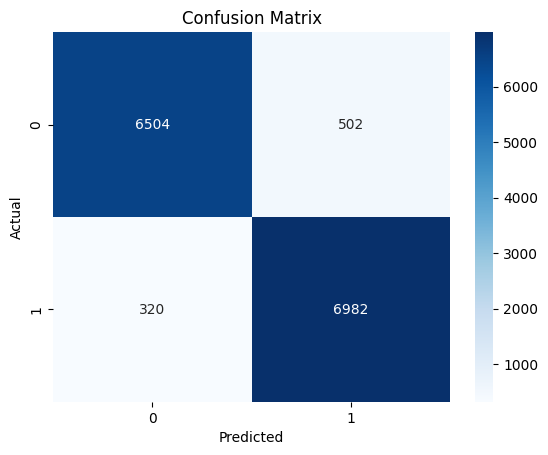

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      7006
           1       0.93      0.96      0.94      7302

    accuracy                           0.94     14308
   macro avg       0.94      0.94      0.94     14308
weighted avg       0.94      0.94      0.94     14308



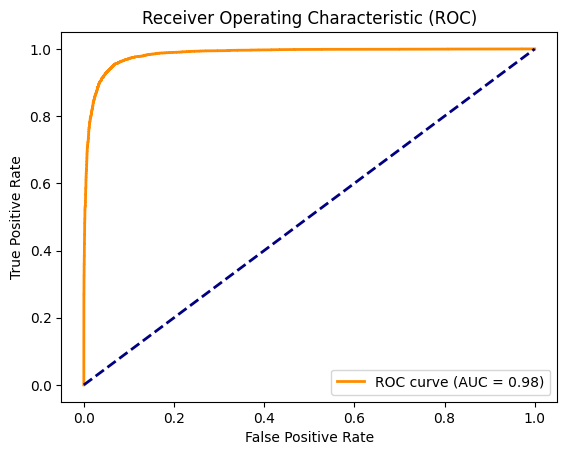

In [23]:
y_pred = model.predict(X_test_vectors)
y_proba = model.predict_proba(X_test_vectors)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test, y_pred))

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [24]:
from sklearn.metrics import accuracy_score

print("Test Accuracy:", accuracy_score(y_test, y_pred))



Test Accuracy: 0.9425496225887615
